## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Set Visualization style

In [4]:
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.3)
plt.rcParams.update({
    "figure.figsize": (14,8),
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 8
})
sns.set_palette('tab10')

## Load Dataset

In [5]:
df = pd.read_csv("company_esg_financial_dataset.csv")
df.head()

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8


## Understand Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          11000 non-null  int64  
 1   CompanyName        11000 non-null  object 
 2   Industry           11000 non-null  object 
 3   Region             11000 non-null  object 
 4   Year               11000 non-null  int64  
 5   Revenue            11000 non-null  float64
 6   ProfitMargin       11000 non-null  float64
 7   MarketCap          11000 non-null  float64
 8   GrowthRate         10000 non-null  float64
 9   ESG_Overall        11000 non-null  float64
 10  ESG_Environmental  11000 non-null  float64
 11  ESG_Social         11000 non-null  float64
 12  ESG_Governance     11000 non-null  float64
 13  CarbonEmissions    11000 non-null  float64
 14  WaterUsage         11000 non-null  float64
 15  EnergyConsumption  11000 non-null  float64
dtypes: float64(11), int64(

In [7]:
df.describe()

,CompanyID,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,10000.000000,11000.000000,11000.000000,11000.000000,11000.000000,1.100000e+04,1.100000e+04,1.100000e+04
mean,500.500000,2020.000000,4670.850591,10.900455,13380.622236,4.830370,54.615273,56.416991,55.660582,51.767655,1.271462e+06,5.600442e+05,1.165839e+07
std,288.688113,3.162421,9969.954369,8.758711,39922.870373,9.424787,15.893937,26.767233,23.356152,25.323370,5.067760e+06,1.565686e+06,5.095836e+07
min,1.000000,2015.000000,35.900000,-20.000000,1.800000,-36.000000,6.300000,0.000000,0.000000,0.000000,2.042200e+03,1.021100e+03,5.105500e+03
25%,250.750000,2017.000000,938.775000,5.300000,1098.525000,-1.325000,44.100000,34.700000,37.600000,30.775000,1.228530e+05,6.488467e+04,3.069161e+05
50%,500.500000,2020.000000,1902.300000,10.500000,3096.450000,4.900000,54.600000,55.600000,55.150000,52.100000,2.920734e+05,2.038805e+05,1.221745e+06
75%,750.250000,2023.000000,4342.625000,16.300000,9995.500000,11.000000,65.600000,79.000000,73.800000,73.000000,7.407311e+05,5.251880e+05,5.616437e+06
max,1000.000000,2025.000000,180810.400000,50.000000,865271.700000,38.000000,98.800000,100.000000,100.000000,100.000000,1.741047e+08,5.223142e+07,1.741047e+09


In [8]:
df.isnull().sum() # check null values

CompanyID               0
CompanyName             0
Industry                0
Region                  0
Year                    0
Revenue                 0
ProfitMargin            0
MarketCap               0
GrowthRate           1000
ESG_Overall             0
ESG_Environmental       0
ESG_Social              0
ESG_Governance          0
CarbonEmissions         0
WaterUsage              0
EnergyConsumption       0
dtype: int64

In [9]:
print(f"Duplicates: {df.duplicated().sum()}") # check duplicates

Duplicates: 0


No duplicate values in this dataset

In [10]:
# Unique counts for IDs, companies, industries, regions, years
print("\nUnique CompanyIDs:", df['CompanyID'].nunique())
print("Unique CompanyNames:", df['CompanyName'].nunique())
print("Unique Industries:", df['Industry'].nunique())
print("Unique Regions:", df['Region'].nunique())
print("Unique Years:", df['Year'].nunique())


Unique CompanyIDs: 1000
Unique CompanyNames: 1000
Unique Industries: 9
Unique Regions: 7
Unique Years: 11


In [11]:
# Verify panel structure: rows per company
rows_per_company = df.groupby('CompanyID').size().unique()
print("\nRows per company:", rows_per_company)


Rows per company: [11]


In [12]:
# Show all possible categorical values
print("\nAll Industries:\n", df['Industry'].unique())
print("\nAll Regions:\n", df['Region'].unique())


All Industries:
 ['Retail' 'Transportation' 'Technology' 'Finance' 'Healthcare' 'Energy'
 'Consumer Goods' 'Utilities' 'Manufacturing']

All Regions:
 ['Latin America' 'Asia' 'Africa' 'Middle East' 'Oceania' 'Europe'
 'North America']


In [13]:
# Year distribution
print("\nYear distribution:\n", df['Year'].value_counts().sort_index())


Year distribution:
 Year
2015    1000
2016    1000
2017    1000
2018    1000
2019    1000
2020    1000
2021    1000
2022    1000
2023    1000
2024    1000
2025    1000
Name: count, dtype: int64


## Data Preparation

#### Feature Engineering

In [14]:
# Handle missing GrowthRate
df['GrowthRate'] = df['GrowthRate'].fillna(df['GrowthRate'].median())

In [15]:
# Create Intensity Metrics for Revenue
eps = 1e-9  # prevent division by zero
df['Carbon_per_Revenue'] = df['CarbonEmissions'] / (df['Revenue'] + eps)
df['Water_per_Revenue'] = df['WaterUsage'] / (df['Revenue'] + eps)
df['Energy_per_Revenue'] = df['EnergyConsumption'] / (df['Revenue'] + eps)

In [16]:
# Log transform skewed financial data
df['LogRevenue'] = np.log1p(df['Revenue'])
df['LogMarketCap'] = np.log1p(df['MarketCap'])

#### Detect Outliers

In [17]:
# Define numeric columns
numeric_cols = ['Revenue','ProfitMargin','MarketCap',
                'GrowthRate','CarbonEmissions','WaterUsage','EnergyConsumption','ESG_Overall']

# Function to detect outliers using IQR
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    return outliers
# Display number of outliers for each column with Top 5 outliers
for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")
    print(f"Top 5 outlier values for {col}: {outliers.sort_values(ascending=False).head(5).tolist()}\n")

Revenue: 1202 outliers
Top 5 outlier values for Revenue: [180810.4, 168988.9, 154868.9, 151162.4, 144823.6]

ProfitMargin: 196 outliers
Top 5 outlier values for ProfitMargin: [50.0, 50.0, 50.0, 50.0, 50.0]

MarketCap: 1354 outliers
Top 5 outlier values for MarketCap: [865271.7, 821387.0, 743858.3, 667399.7, 635311.9]

GrowthRate: 216 outliers
Top 5 outlier values for GrowthRate: [38.0, 37.7, 37.5, 36.2, 36.1]

CarbonEmissions: 1289 outliers
Top 5 outlier values for CarbonEmissions: [174104721.4, 156960283.7, 136181429.6, 116218891.1, 108229578.1]

WaterUsage: 1129 outliers
Top 5 outlier values for WaterUsage: [52231416.4, 47088085.1, 40854428.9, 34865667.3, 32468873.4]

EnergyConsumption: 1430 outliers
Top 5 outlier values for EnergyConsumption: [1741047214.3, 1569602836.9, 1361814295.8, 1162188911.1, 1082295780.8]

ESG_Overall: 13 outliers
Top 5 outlier values for ESG_Overall: [98.8, 98.3, 98.2, 98.0, 11.7]



# Data Analysis

## Univariate Analysis

#### 1. What is the distribution of ESG scores across all companies?

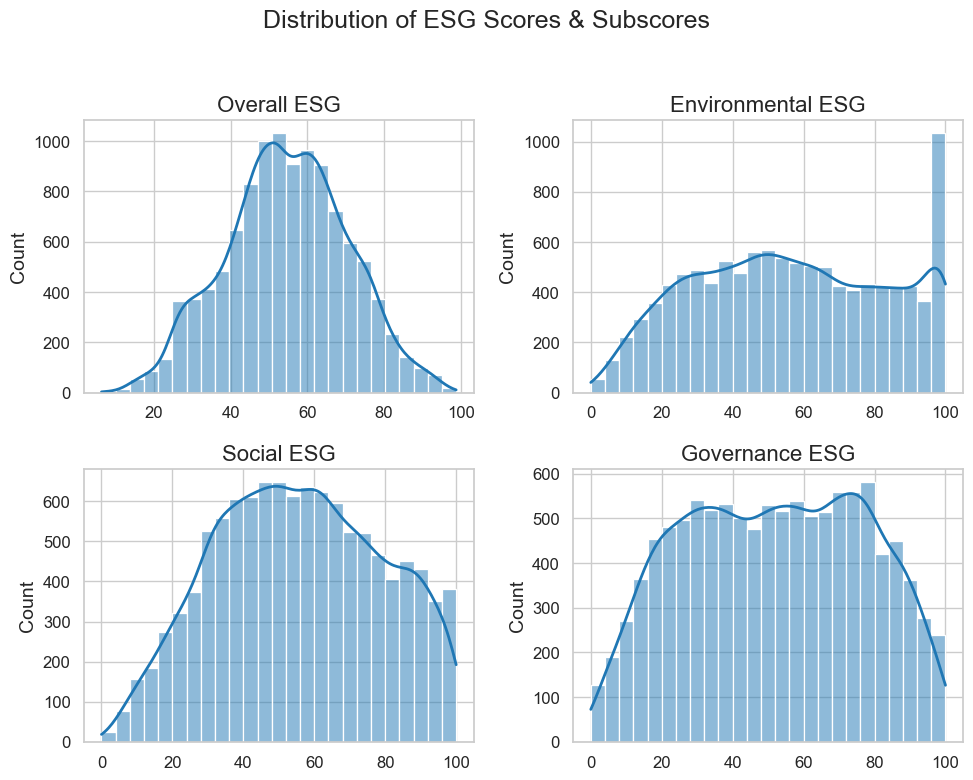

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))
cols = ['ESG_Overall','ESG_Environmental','ESG_Social','ESG_Governance']
titles = ['Overall ESG','Environmental ESG','Social ESG','Governance ESG']

for ax, col, title in zip(axes.flatten(), cols, titles):
    sns.histplot(df[col], kde=True, bins=25, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('')
plt.suptitle("Distribution of ESG Scores & Subscores", fontsize=18)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

#### 2. How many Companies in each Industry/Region?

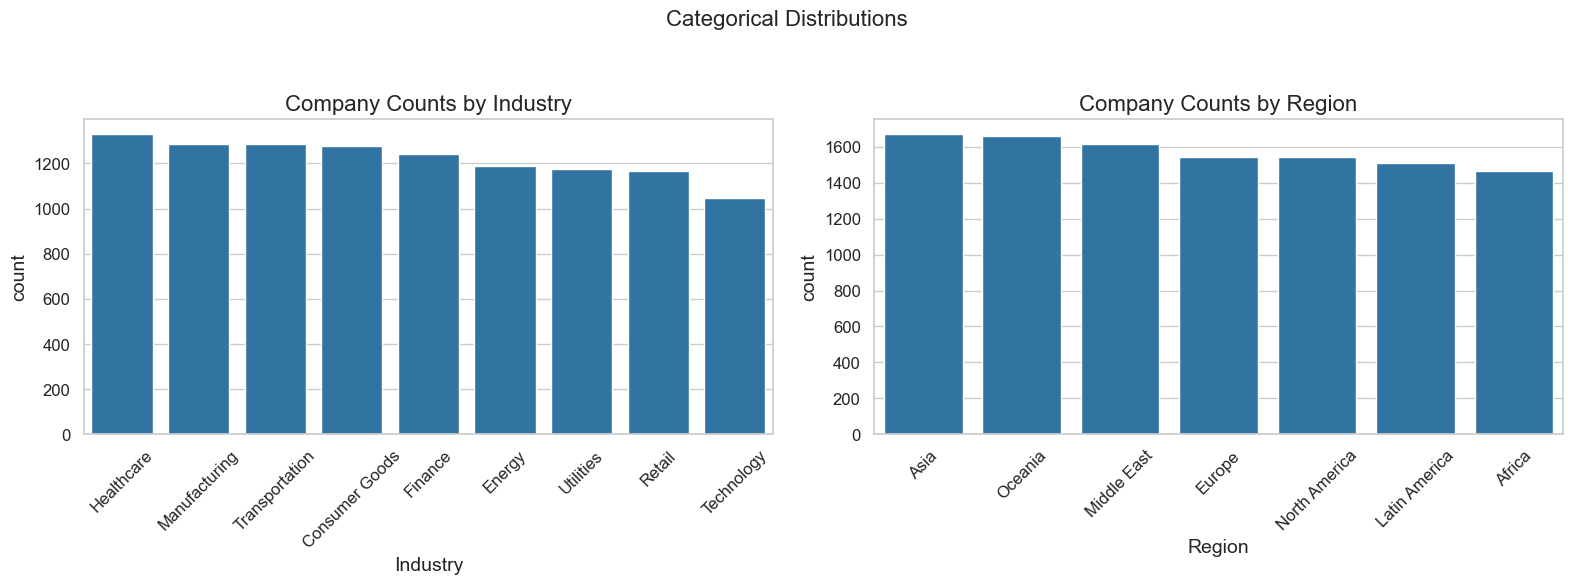

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.countplot(data=df, x='Industry', order=df['Industry'].value_counts().index, ax=axes[0])
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title("Company Counts by Industry")

sns.countplot(data=df, x='Region', order=df['Region'].value_counts().index, ax=axes[1])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title("Company Counts by Region")

plt.suptitle("Categorical Distributions", fontsize=16)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

## Bivariate Analysis

#### 3. Do companies with lower Carbon/Water/Energy intensity have higher ESG?

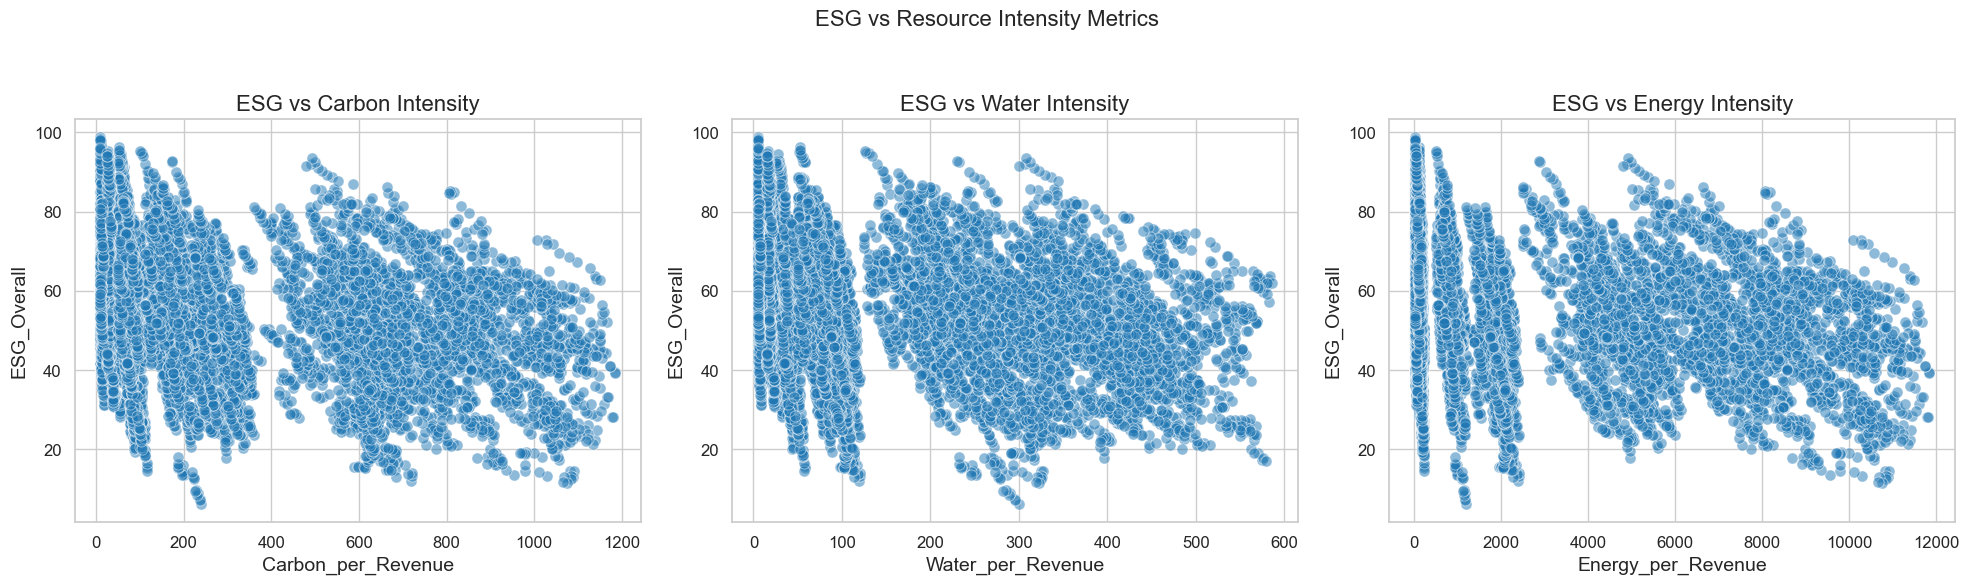

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

sns.scatterplot(x='Carbon_per_Revenue', y='ESG_Overall', data=df, alpha=0.5, ax=axes[0])
axes[0].set_title("ESG vs Carbon Intensity")

sns.scatterplot(x='Water_per_Revenue', y='ESG_Overall', data=df, alpha=0.5, ax=axes[1])
axes[1].set_title("ESG vs Water Intensity")

sns.scatterplot(x='Energy_per_Revenue', y='ESG_Overall', data=df, alpha=0.5, ax=axes[2])
axes[2].set_title("ESG vs Energy Intensity")

plt.suptitle("ESG vs Resource Intensity Metrics", fontsize=16)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

#### 4. Are ESG scores linked to Revenue, ProfitMargin, MarketCap, GrowthRate?

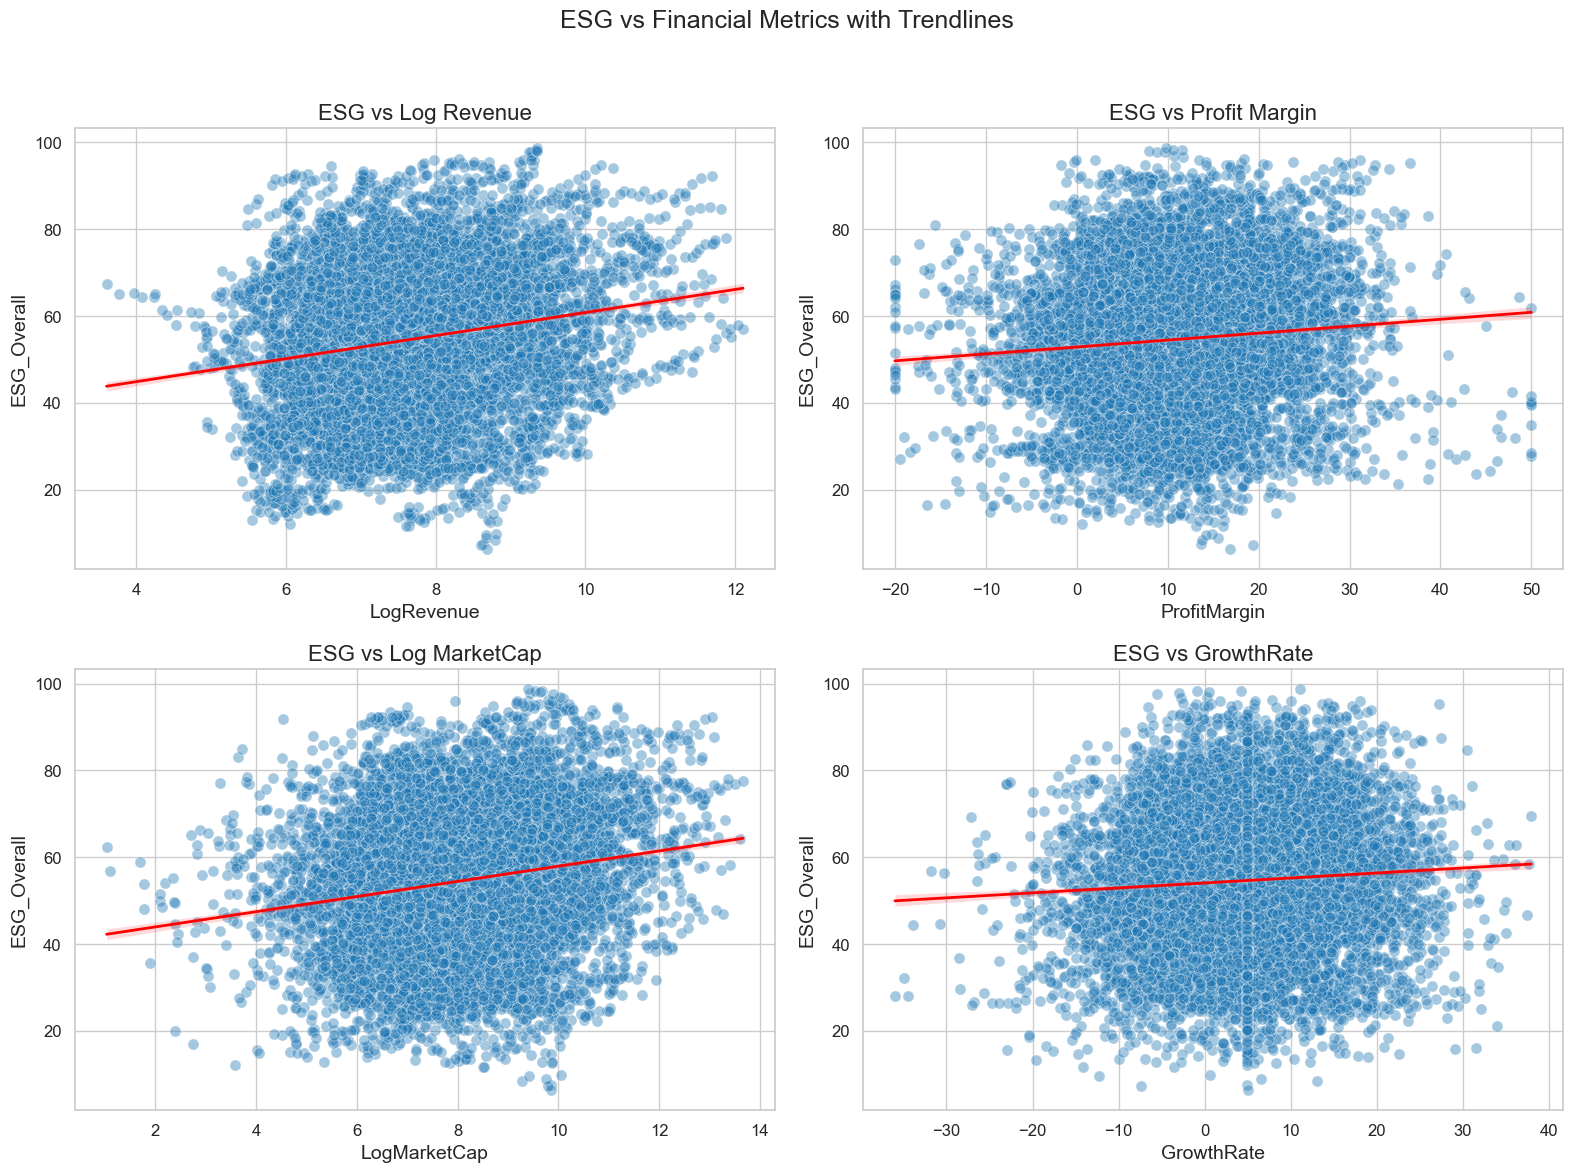

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))
fin_cols = ['LogRevenue','ProfitMargin','LogMarketCap','GrowthRate']
titles = ['ESG vs Log Revenue', 'ESG vs Profit Margin', 'ESG vs Log MarketCap', 'ESG vs GrowthRate']

for ax, col, title in zip(axes.flatten(), fin_cols, titles):
    sns.scatterplot(x=col, y='ESG_Overall', data=df, alpha=0.4, ax=ax)
    sns.regplot(x=col, y='ESG_Overall', data=df, scatter=False, ax=ax, color='red', line_kws={"linewidth":2})
    ax.set_title(title)
plt.suptitle("ESG vs Financial Metrics with Trendlines", fontsize=18)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

## Multivariate Analysis

#### 5. How does ESG trend over years by Industry/Region?

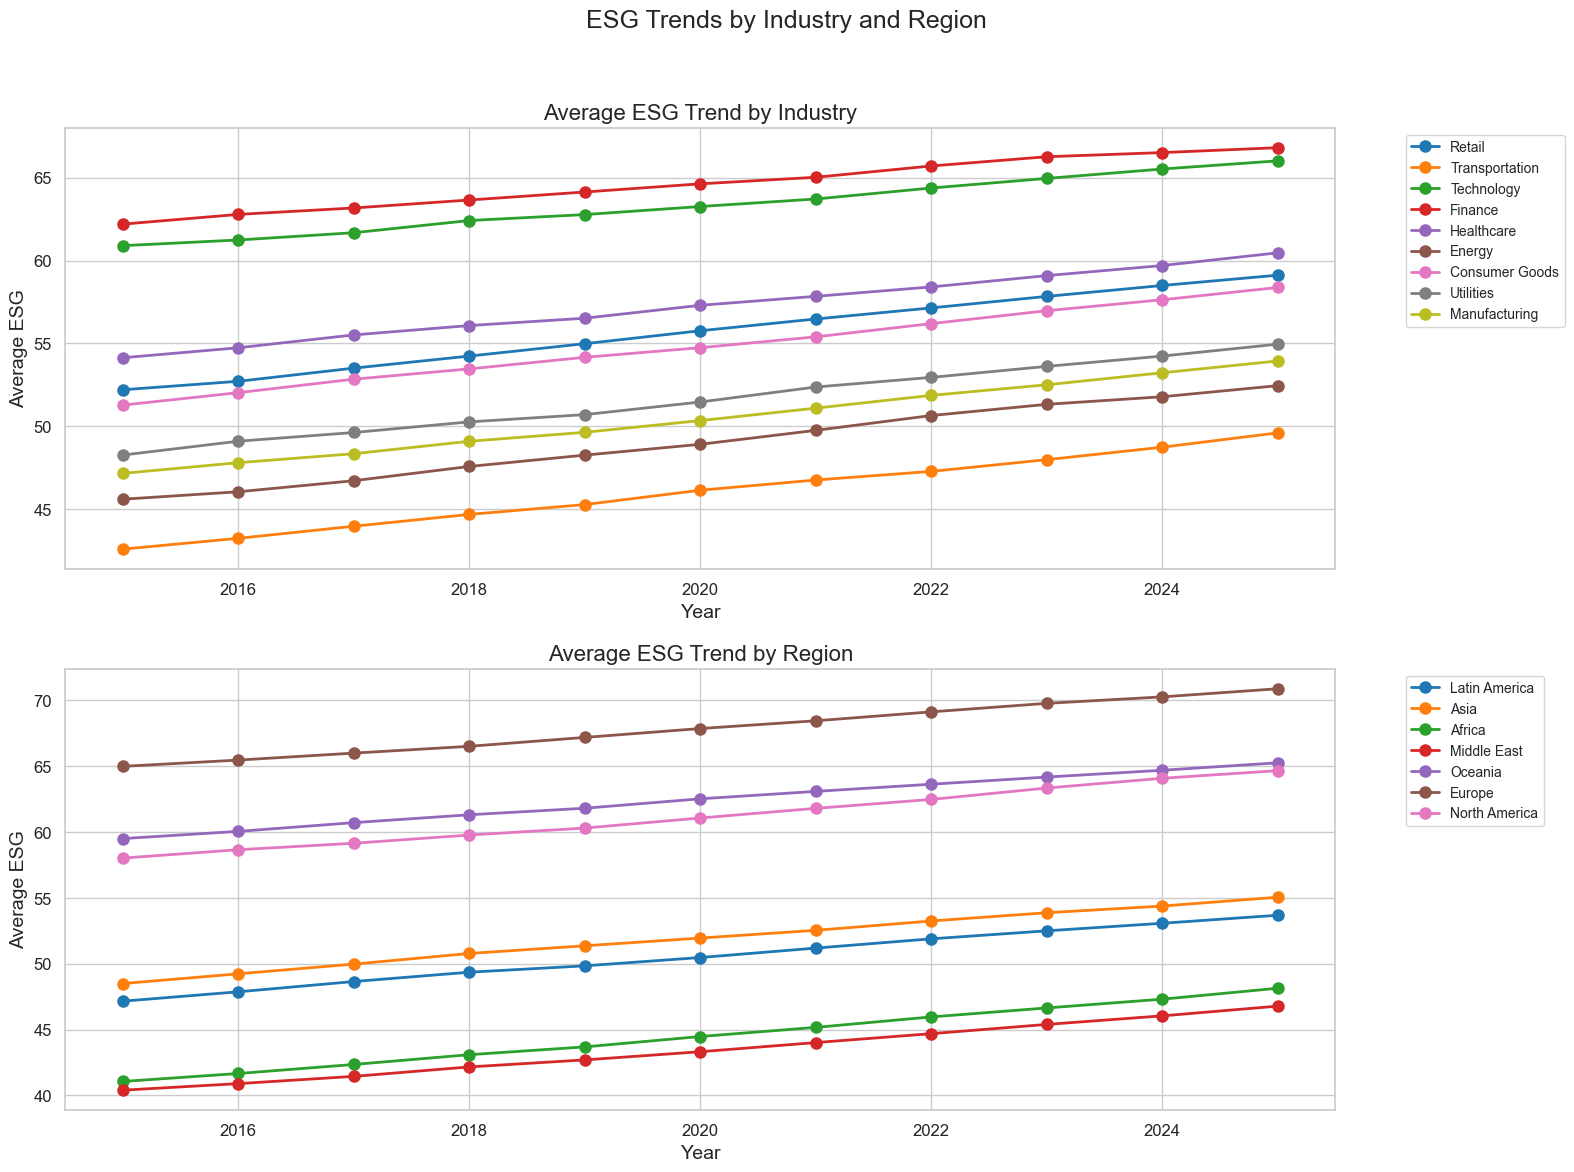

In [22]:
industries = df['Industry'].unique()
regions = df['Region'].unique()

fig, axes = plt.subplots(2, 1, figsize=(16,12))

# Industry trends
for ind in industries:
    subset = df[df['Industry']==ind].groupby('Year')['ESG_Overall'].mean()
    axes[0].plot(subset.index, subset.values, marker='o', label=ind)
axes[0].set_title("Average ESG Trend by Industry")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Average ESG")
axes[0].legend(bbox_to_anchor=(1.05,1), fontsize=10)

# Region trends
for reg in regions:
    subset = df[df['Region']==reg].groupby('Year')['ESG_Overall'].mean()
    axes[1].plot(subset.index, subset.values, marker='o', label=reg)
axes[1].set_title("Average ESG Trend by Region")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Average ESG")
axes[1].legend(bbox_to_anchor=(1.05,1), fontsize=10)

plt.suptitle("ESG Trends by Industry and Region", fontsize=18)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

#### 6. Which companies are improving or declining in ESG over time?

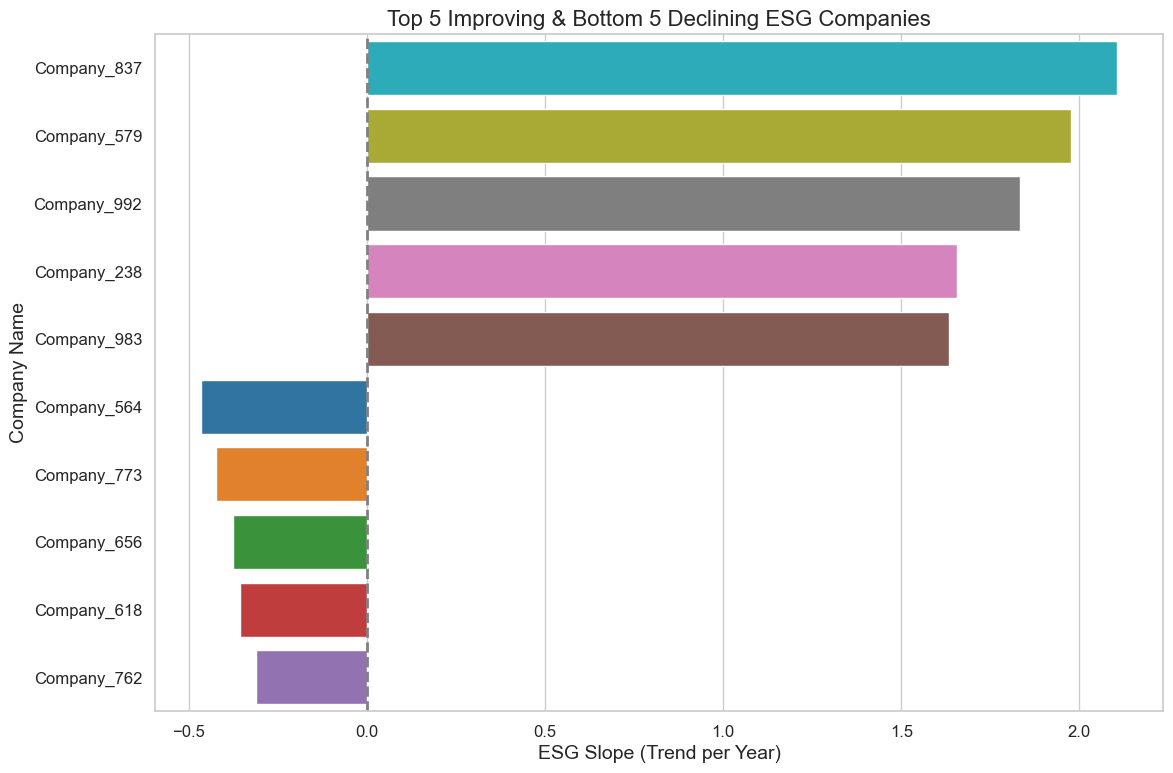

In [23]:
# Compute ESG slope per company
company_trends = df.groupby('CompanyID')[['Year','ESG_Overall']].apply(
    lambda x: np.polyfit(x['Year'], x['ESG_Overall'], 1)[0]
).reset_index()
company_trends.columns = ['CompanyID','ESG_Slope']
df.groupby('CompanyID')[['Year','ESG_Overall']]


# Merge with company info
company_info = df[['CompanyID','CompanyName','Industry','Region']].drop_duplicates()
company_trends = company_trends.merge(company_info, on='CompanyID')

# Top 5 improving & top 5 declining companies
top5 = company_trends.sort_values('ESG_Slope', ascending=False).head(5)
bottom5 = company_trends.sort_values('ESG_Slope').head(5)
slope_vis = pd.concat([top5, bottom5])

# Horizontal bar plot
plt.figure(figsize=(12,8))
sns.barplot(
    x='ESG_Slope', 
    y='CompanyName', 
    data=slope_vis, 
    hue='ESG_Slope', 
    dodge=False,
    palette='tab10'
)

plt.axvline(0, color='gray', linestyle='--')
plt.title('Top 5 Improving & Bottom 5 Declining ESG Companies', fontsize=16)
plt.xlabel('ESG Slope (Trend per Year)')
plt.ylabel('Company Name')
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

#### 7. How does ESG trend over years by Industry?

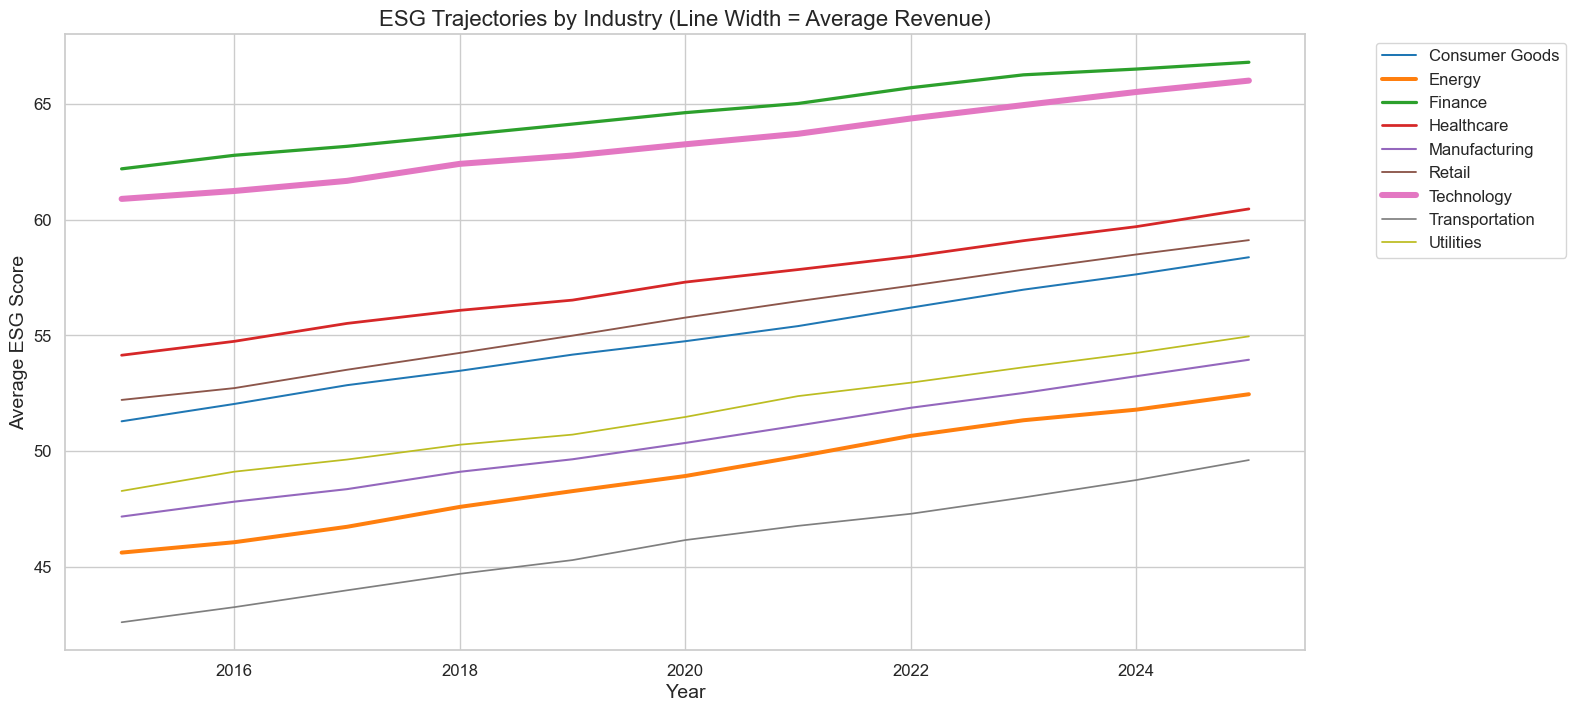

In [24]:
# Aggregate by Industry-Year
industry_year = df.groupby(['Year','Industry']).agg({
    'ESG_Overall':'mean',
    'Revenue':'mean'
}).reset_index()

plt.figure(figsize=(16,8))

industries = industry_year['Industry'].unique()
palette = sns.color_palette("tab10", n_colors=len(industries))

for i, ind in enumerate(industries):
    subset = industry_year[industry_year['Industry']==ind]
    lw = subset['Revenue'].mean() / industry_year['Revenue'].max() * 5 + 1
    plt.plot(
        subset['Year'], 
        subset['ESG_Overall'], 
        linewidth=lw,
        color=palette[i], 
        label=ind
    )

plt.title('ESG Trajectories by Industry (Line Width = Average Revenue)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average ESG Score')
plt.legend(bbox_to_anchor=(1.05,1), fontsize=12)
plt.grid(True)
plt.show()

#### 8. How does ESG Trend over years by Region?

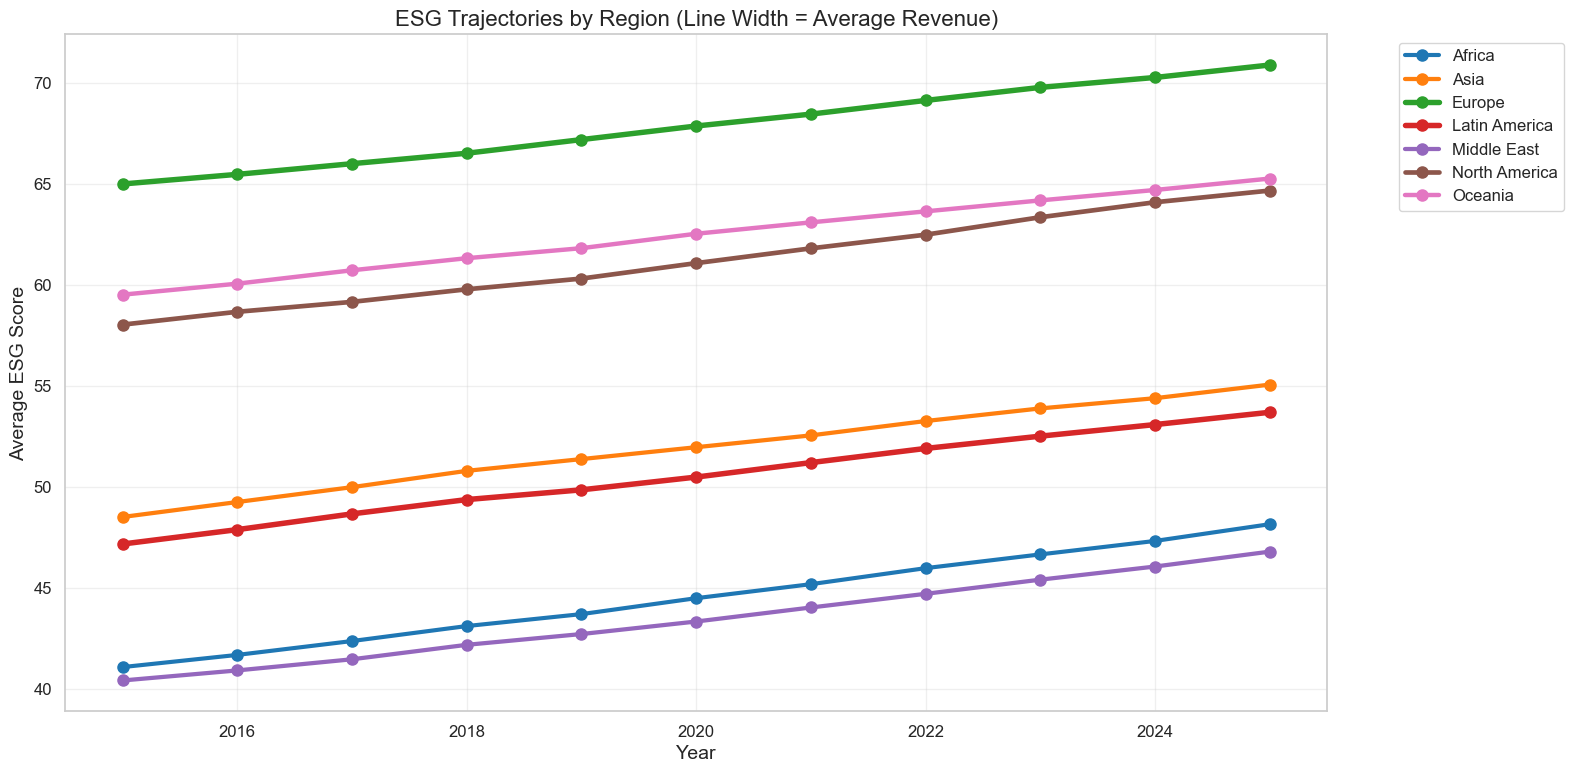

In [25]:
# Aggregate by Region-Year
region_year = df.groupby(['Year','Region']).agg({
    'ESG_Overall':'mean',
    'Revenue':'mean'
}).reset_index()

plt.figure(figsize=(16,8))
regions = region_year['Region'].unique()
palette = sns.color_palette("tab10", n_colors=len(regions))

for i, reg in enumerate(regions):
    subset = region_year[region_year['Region']==reg]
    x = subset['Year']
    y = subset['ESG_Overall']
    lw = subset['Revenue'].mean() / region_year['Revenue'].max() * 5 + 0.5
    plt.plot(x, y, color=palette[i], marker='o', linewidth=lw, label=reg)

plt.title('ESG Trajectories by Region (Line Width = Average Revenue)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average ESG Score')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05,1), fontsize=12)
plt.tight_layout()
plt.show()

#### 9. How are ESG subscores and financial metrics correlated?

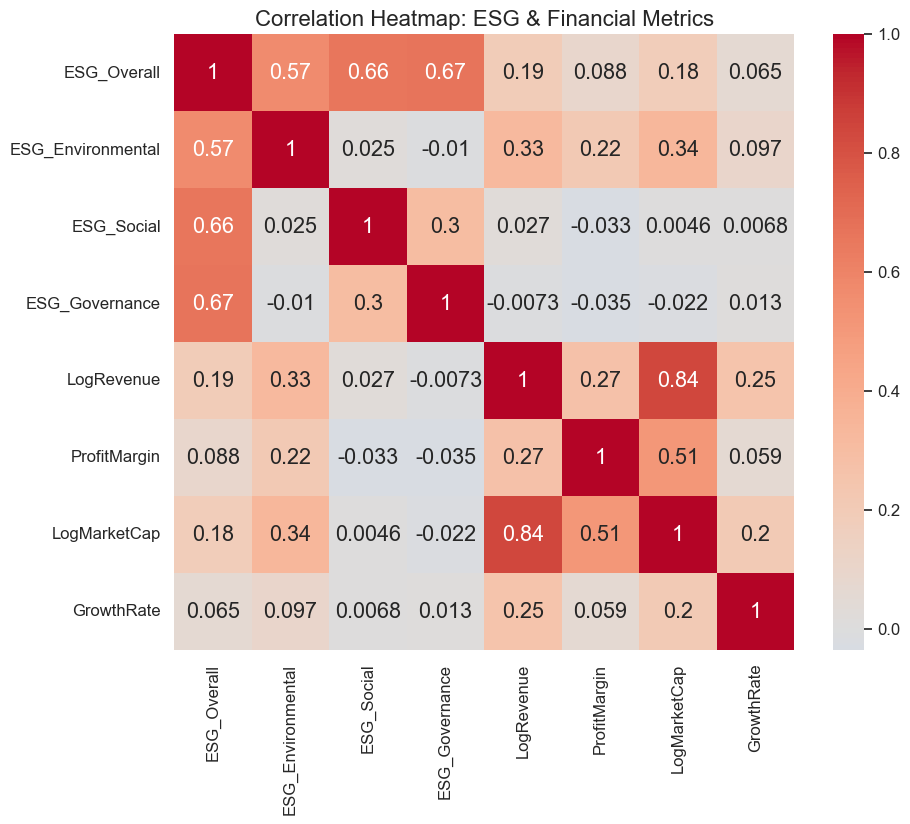

In [26]:
corr_cols = ['ESG_Overall','ESG_Environmental','ESG_Social','ESG_Governance',
             'LogRevenue','ProfitMargin','LogMarketCap','GrowthRate']

plt.figure(figsize=(10,8))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: ESG & Financial Metrics', fontsize=16)
plt.show()

#### 10. Which industries are the most inconsistent in ESG scores?

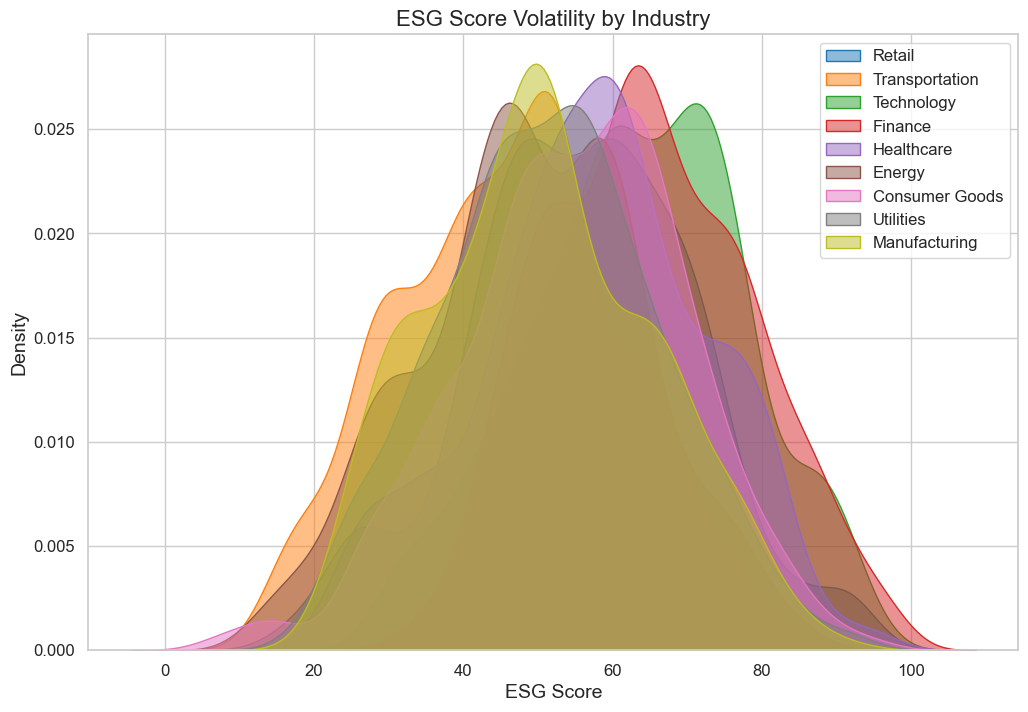

In [27]:
plt.figure(figsize=(12,8))
industries = df['Industry'].unique()
palette = sns.color_palette("tab10", len(industries))

for i, ind in enumerate(industries):
    subset = df[df['Industry'] == ind]
    sns.kdeplot(subset['ESG_Overall'], fill=True, alpha=0.5, label=ind, color=palette[i])

plt.title('ESG Score Volatility by Industry', fontsize=16)
plt.xlabel('ESG Score')
plt.ylabel('Density')
plt.legend()
plt.show()

#### 11. Which companies are extreme outliers in ESG scores, and how do they relate to company size (Revenue)?

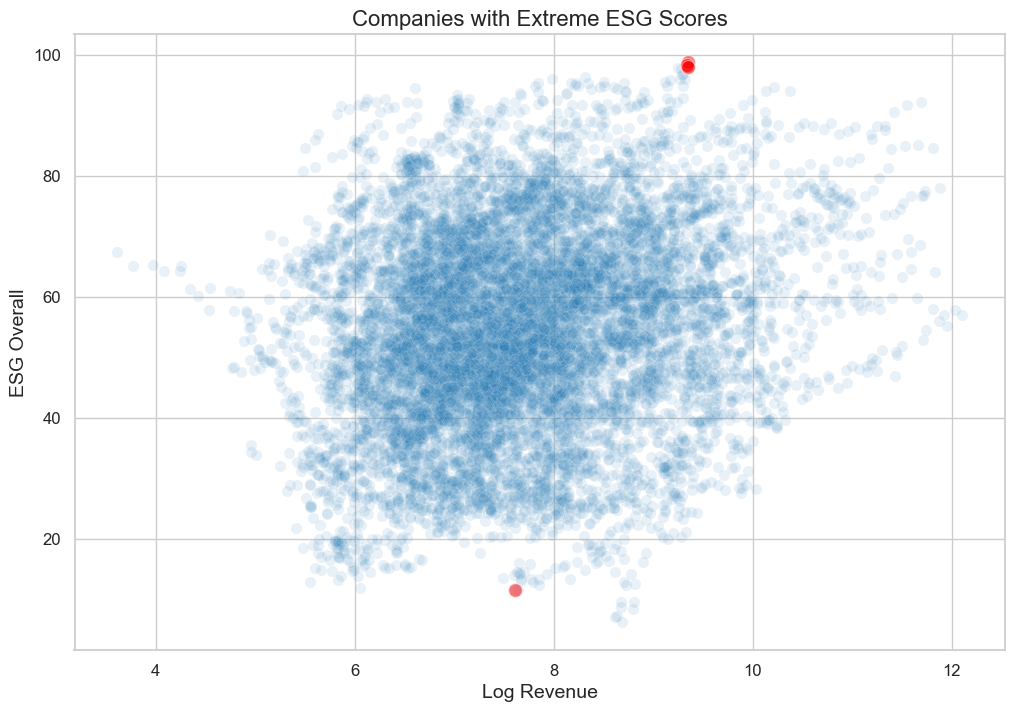

In [38]:
# ESG outliers
esg_outliers = df[df['ESG_Overall'].isin([98.8, 98.3, 98.2, 98.0, 11.7])]

plt.figure(figsize=(12,8))

# All companies
sns.scatterplot(x='LogRevenue', y='ESG_Overall', alpha=0.1, data=df)

# Highlight outliers
sns.scatterplot(x='LogRevenue', y='ESG_Overall', alpha=0.5, s=100, color='red', data=esg_outliers)

plt.xlabel('Log Revenue')
plt.ylabel('ESG Overall')
plt.title('Companies with Extreme ESG Scores')

plt.show()

# Key Insights

1. **Distribution of ESG scores and subscores is mostly predictable:** Score distributions largely follow the standard bell curve, though there is a huge spike in the amount of top scorers for Environmental ESG.

2. **Number of companies do not vary a lot by industry or region:** Technological sector has slightly less companies, and Africa has the least by region, but the number of companies differs by less than 300 in both metrics.    

3. **Resource Intensity Varies Significantly:** Carbon, Water, and Energy usage per Revenue differ widely, and high ESG companies tend to have lower resource intensity ratios.

4. **Industry Differences Are Significant:** Certain industries (e.g., Finance, Technology) consistently show higher environmental impacts per unit revenue, suggesting targeted sustainability efforts.

5. **Regional Patterns Exist:** ESG scores vary by Region; e.g., Europe has generally the highest ESG scores, while Africa and Middle East tend to have the lowest.

6. **Financial Performance vs ESG:** High revenue or market capitalization does not guarantee high ESG — some large companies are still ESG laggards.

7. **Temporal Trends:** ESG scores have generally improved over time for most companies, but some laggards persist, indicating potential for policy or best-practice sharing.

# Policy Recommendations

1. **Resource Efficiency Incentives:** Encourage companies to adopt energy-saving technologies, water recycling, and carbon-reduction strategies, with measurable targets per unit revenue.

2. **Industry-Specific ESG Benchmarks:** Establish sector-specific ESG standards and reporting guidelines, recognizing top performers and supporting laggards with targeted guidance.

3. **Regional Best-Practice Programs:** Facilitate knowledge-sharing and workshops where companies in lower-performing regions can learn sustainability strategies from high-performing regions.

4. **Targeted Outlier Engagement:** Identify extreme ESG laggards and provide tailored improvement plans, including consulting support, technology grants, or investor guidance.

5. **ESG-Integrated Corporate & Investment Decisions:** Tie ESG performance to executive bonuses, funding decisions, and investment criteria to ensure sustainability is prioritized alongside financial growth.